# Introduction

### Import the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

### Notebook display settings

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

import warnings
warnings.filterwarnings("ignore")

### Default figure settings

In [3]:
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.titleweight']='bold'
mpl.rcParams['axes.labelweight']='normal'
mpl.rcParams['figure.figsize']=(8,6)
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.sans-serif'] = "Arial"

### Get the number of cpu

In [4]:
import multiprocessing as mp
n_cpu=mp.cpu_count()

# Data Transformation & Exploration

### Read the data

In [5]:
training_data=pd.read_csv('Data/epl-training.csv')
# Dropping the trailing columns
training_data.dropna(axis=1, how='all',inplace=True)
training_data.drop([column for column in training_data.columns if 'Unnamed' in column], axis = 1, inplace=True) 
training_data.shape

(4180, 22)

In [6]:
training_data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,16/08/2008,Arsenal,West Brom,1,0,H,1,0,H,H Webb,24,5,14,4,11,8,7,5,0,0,0,0
1,16/08/2008,Bolton,Stoke,3,1,H,3,0,H,C Foy,14,8,8,2,13,12,4,3,1,2,0,0
2,16/08/2008,Everton,Blackburn,2,3,A,1,1,D,A Marriner,10,15,5,11,11,9,3,5,2,2,0,0
3,16/08/2008,Hull,Fulham,2,1,H,1,1,D,P Walton,11,12,6,6,10,9,5,6,3,0,0,0
4,16/08/2008,Middlesbrough,Tottenham,2,1,H,0,0,D,M Atkinson,14,8,10,5,11,12,7,9,1,2,0,0


### Exploratory Data Analysis

In [7]:
def get_pivot_column_vs_column_count(df,col1,col2):
    return df.groupby([col1,col2]).size().reset_index().\
              rename(columns={0:'counts'}).\
              pivot(values='counts',index=col1,columns=col2)

In [8]:
def get_column_countplot(df,col,y='FTR',ax=None ):
    if ax is None:
        ax = plt.gca()
    df.groupby([col, y]).size().reset_index().\
       pivot(columns=y, index=col, values=0).\
       plot(kind='bar', stacked=True,ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Counts')
    ax.set_title('Count Plot: %s'%(col))

#### Number of matches

In [9]:
get_pivot_column_vs_column_count(training_data,'HomeTeam','AwayTeam')

AwayTeam,Arsenal,Aston Villa,Birmingham,Blackburn,Blackpool,Bolton,Bournemouth,Brighton,Burnley,Cardiff,Chelsea,Crystal Palace,Everton,Fulham,Huddersfield,Hull,Leicester,Liverpool,Man City,Man United,Middlesbrough,Newcastle,Norwich,Portsmouth,QPR,Reading,Southampton,Stoke,Sunderland,Swansea,Tottenham,Watford,West Brom,West Ham,Wigan,Wolves
HomeTeam,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Arsenal,NaN,8.0,2.0,4.0,1.0,4.0,4.0,2.0,5.0,2.0,11.0,6.0,11.0,7.0,2.0,5.0,5.0,11.0,11.0,11.0,2.0,9.0,4.0,2.0,3.0,1.0,7.0,10.0,9.0,7.0,11.0,4.0,9.0,10.0,5.0,4.0
Aston Villa,8.0,NaN,2.0,4.0,1.0,4.0,1.0,NaN,2.0,1.0,8.0,3.0,8.0,6.0,NaN,4.0,2.0,8.0,8.0,8.0,1.0,7.0,4.0,2.0,3.0,1.0,4.0,8.0,8.0,5.0,8.0,1.0,7.0,7.0,5.0,3.0
Birmingham,2.0,2.0,NaN,2.0,1.0,2.0,NaN,NaN,1.0,NaN,2.0,NaN,2.0,2.0,NaN,1.0,NaN,2.0,2.0,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,2.0,2.0,NaN,2.0,NaN,1.0,2.0,2.0,2.0
Blackburn,4.0,4.0,2.0,NaN,1.0,4.0,NaN,NaN,1.0,NaN,4.0,NaN,4.0,4.0,NaN,2.0,NaN,4.0,4.0,4.0,1.0,3.0,1.0,2.0,1.0,NaN,NaN,4.0,4.0,1.0,4.0,NaN,3.0,3.0,4.0,3.0
Blackpool,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0
Bolton,4.0,4.0,2.0,4.0,1.0,NaN,NaN,NaN,1.0,NaN,4.0,NaN,4.0,4.0,NaN,2.0,NaN,4.0,4.0,4.0,1.0,3.0,1.0,2.0,1.0,NaN,NaN,4.0,4.0,1.0,4.0,NaN,3.0,3.0,4.0,3.0
Bournemouth,4.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,3.0,1.0,4.0,4.0,4.0,1.0,2.0,1.0,4.0,4.0,4.0,4.0,1.0,3.0,1.0,NaN,NaN,NaN,4.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,NaN,1.0
Brighton,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,1.0,2.0,2.0,1.0,2.0,NaN,1.0
Burnley,5.0,2.0,1.0,1.0,NaN,1.0,3.0,2.0,NaN,1.0,5.0,4.0,5.0,2.0,2.0,3.0,4.0,5.0,5.0,5.0,1.0,3.0,NaN,1.0,1.0,NaN,4.0,4.0,3.0,3.0,5.0,3.0,3.0,5.0,1.0,2.0


### HTR vs. FTR

In [10]:
get_pivot_column_vs_column_count(training_data,'HTR','FTR')

FTR,A,D,H
HTR,,,
A,703,199,99
D,439,647,646
H,70,191,1186


In [11]:
cat_col_list=[x for x in training_data.columns\
              if x not in ['Date','HomeTeam','AwayTeam','Referee','FTR','HTR']]

In [12]:
cat_col_list = np.reshape(cat_col_list, (8, 2))

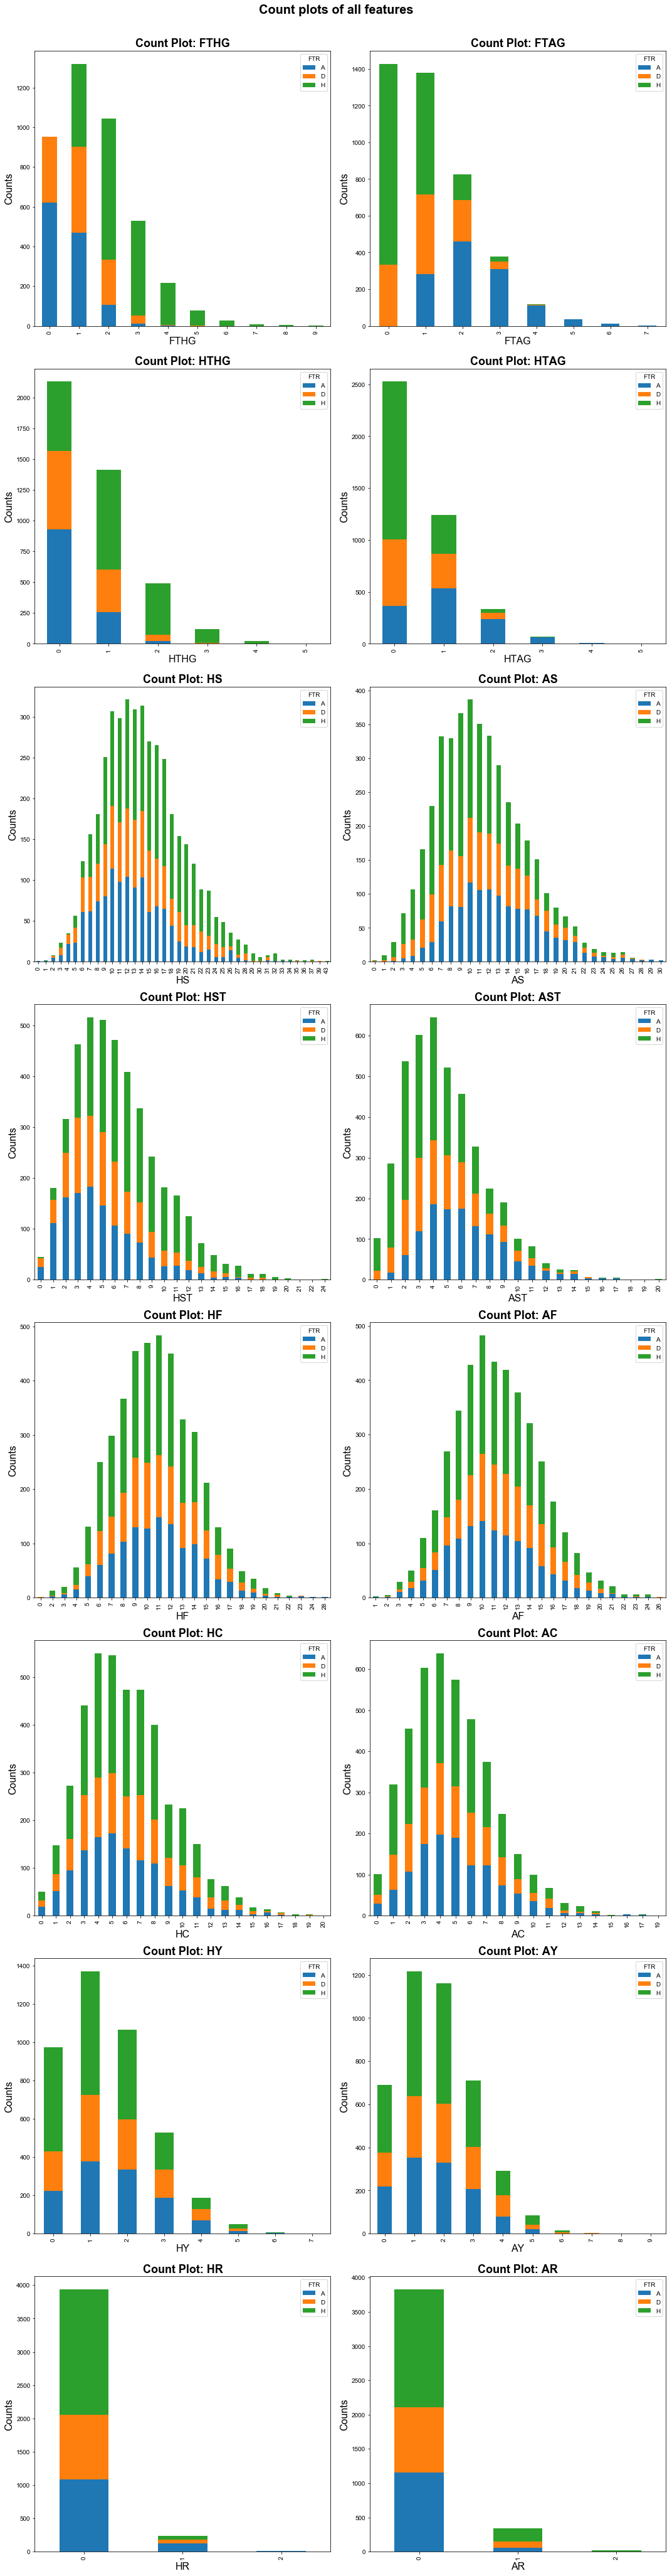

In [13]:
fig, axes = plt.subplots(8,2,figsize=(15,60))
for i in range(8):
    for j in range(2):
        get_column_countplot(training_data,cat_col_list[i][j], ax=axes[i,j])
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.suptitle("Count plots of all features",fontweight='bold',fontsize=20)
plt.show()

### Number of referees

There are 36 referees (possibly one from each team).

In [44]:
training_data['Referee'].nunique()

36

### Checking the dataset is balanced

In [14]:
count_val=training_data['FTR'].value_counts()

In [15]:
count_val

H    1931
A    1212
D    1037
Name: FTR, dtype: int64

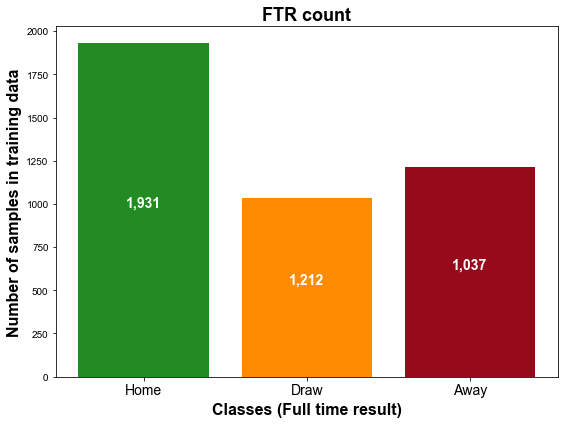

In [16]:
count_val=training_data['FTR'].value_counts()

#Visualising the count
X_ticks=['Home','Draw','Away']
bar_width=0.7
fig,ax=plt.subplots()
plt.bar(1,count_val[0],color='forestgreen')
plt.bar(2,count_val[2],color='darkorange')
plt.bar(3,count_val[1],color='#970a1b')
plt.text(1, count_val[0]/2, "{:,}".format(count_val[0]),color='w',
         ha='center', va= 'bottom',fontweight='bold',fontsize=14)
plt.text(2, count_val[2]/2, "{:,}".format(count_val[1]), color='w'
         ,ha='center', va= 'bottom',fontweight='bold',fontsize=14)
plt.text(3, count_val[1]/2, "{:,}".format(count_val[2]), color='w',
         ha='center', va= 'bottom',fontweight='bold',fontsize=14)
ax.set_title('FTR count',fontsize=18,fontweight='bold')
ax.set_xlabel('Classes (Full time result)',fontsize=16,fontweight='bold')
ax.set_ylabel('Number of samples in training data',fontsize=16,
              fontweight='bold')
ax.set_xticks([1,2,3])
ax.set_xticklabels(X_ticks,fontsize=14)
fig.tight_layout()
plt.show()

### Calculate the correlation between the features

In [17]:
correlation = training_data.corr()
corr_array  = np.array(correlation)

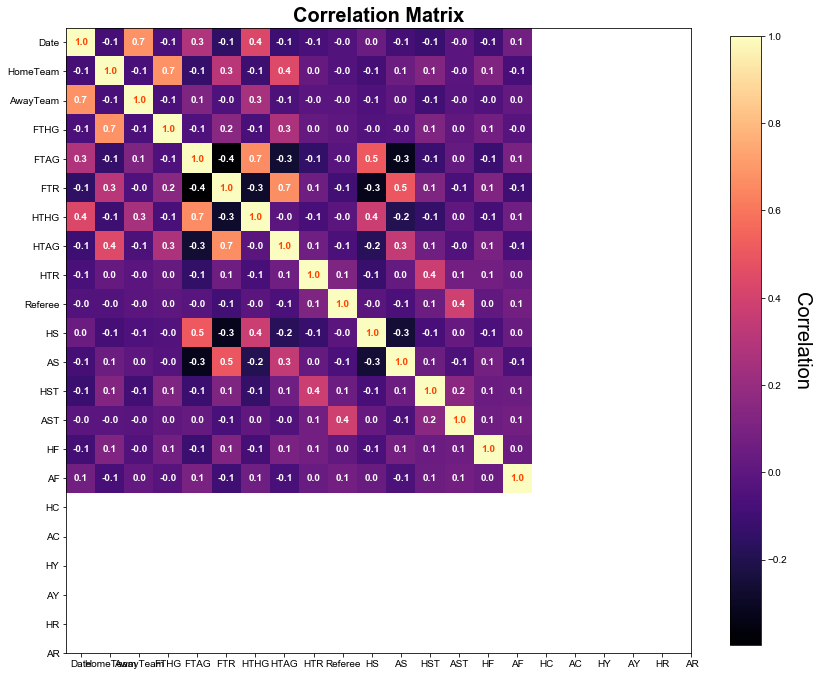

In [18]:
fig, ax = plt.subplots(figsize=(14,14))
im = ax.imshow(corr_array,cmap='magma')
cbar = ax.figure.colorbar(im, ax=ax,shrink=0.8)
cbar.ax.set_ylabel('Correlation', rotation=-90, va="bottom",fontsize=20)
data = im.get_array()
textcolors=['#FFFFFF','#FF4500']
for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, '%1.1f'%data[i, j], 
                                color=textcolors[data[i, j]>0.85],
                                ha='center',va='center',fontweight='bold')
ax.set_title('Correlation Matrix',fontsize=20,fontweight='bold')
ax.set_xticks(np.arange(len(training_data.columns.tolist())))
ax.set_yticks(np.arange(len(training_data.columns)))
ax.set_xticklabels(training_data.columns)
ax.set_yticklabels(training_data.columns)
plt.show()

In [100]:
X=training_data[[column for column in training_data.columns if column not in ['Date','FTR']]]
y=training_data['FTR']

### Encode the values

In [101]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,scale,MinMaxScaler
le = LabelEncoder()
for column in ['HomeTeam','AwayTeam','HTR','Referee']:
    X[column]=LabelEncoder().fit_transform(X[column])
y=le.fit_transform(y)

### Scale the values

In [102]:
X=MinMaxScaler().fit_transform(X)


# Methodology Overview

## Feature Extraction

# Model Training & Validation

## Train the model with all features

cross_validate was chosen over cross_val_score because the former allows more than one metric scores to be passed together.

In [29]:
def get_scores(model,X,y):
    scores = cross_validate(model, X, y, scoring=('accuracy','f1','roc_auc','precision','recall'),
                            cv=10, return_train_score=True,n_jobs=n_cpu)
    print('Accuracy: %f'%(scores['test_accuracy'].mean()))
    print('Precision: %f'%(scores['test_precision'].mean()))
    print('Recall: %f'%(scores['test_recall'].mean()))
    print('f1 Score: %f'%(scores['test_f1'].mean()))
    print('ROC - AUC: %f'%(scores['test_roc_auc'].mean()))
    return scores

In [21]:
def get_best_params(model,X,y,param_grid,refit='accuracy'):
    scoring=('accuracy','f1','roc_auc')
    other_scores=[score for score in list(scoring) if score!=refit] 
    grid_results = RandomizedSearchCV(model, param_grid, 
                                       cv=10,n_jobs=n_cpu,
                                       scoring=scoring,
                                       refit=refit)
    grid_results.fit(X, y)
    print('Best mean %s Score: '%(refit),grid_results.best_score_)
    print('Best parameters: \n',grid_results.best_params_)
    cv_results=grid_results.cv_results_
    cv_results['mean_test_%s'%(refit)].max()
    best_index_results = np.nonzero(cv_results['rank_test_%s'%(refit)] == 1)[0][0]
    best_index_results['mean_test_%s'%(other_scores[0])][best_index_accuracy]
    best_index_results['mean_test_%s'%(other_scores[1])][best_index_accuracy]
    return model

### Logistic Regression Classifier 

In [27]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression


In [30]:
model_LR = LogisticRegression(n_jobs=n_cpu)
get_scores(model_LR,X,y)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\arund\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\arund\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x000001B3BC484ED0, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\arund\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\arund\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\a...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x000001B3BC484ED0, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\arund\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\arund\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\a...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
C:\Users\arund\Anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
C:\Users\arund\Anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(840, 1)>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
C:\Users\arund\Anaconda3\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(840, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (840, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=840, events=1)
    112             self.writers.remove(fd)
    113         del self.handlers[fd]
    114 
    115     def _handle_events(self, fd, events):
    116         fileobj, handler_func = self.handlers[fd]
--> 117         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    118 
    119     def start(self):
    120         try:
    121             old_loop = asyncio.get_event_loop()

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'model_LR = LogisticRegression(n_jobs=n_cpu)\nget_scores(model_LR,X,y)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 12, 22, 10, 22, 20, 678857, tzinfo=tzutc()), 'msg_id': '315936c5207e4ade89a78e487d20762e', 'msg_type': 'execute_request', 'session': '119b6da9c1104fc98d565824c75d28bd', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '315936c5207e4ade89a78e487d20762e', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'119b6da9c1104fc98d565824c75d28bd']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'model_LR = LogisticRegression(n_jobs=n_cpu)\nget_scores(model_LR,X,y)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 12, 22, 10, 22, 20, 678857, tzinfo=tzutc()), 'msg_id': '315936c5207e4ade89a78e487d20762e', 'msg_type': 'execute_request', 'session': '119b6da9c1104fc98d565824c75d28bd', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '315936c5207e4ade89a78e487d20762e', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'119b6da9c1104fc98d565824c75d28bd'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'model_LR = LogisticRegression(n_jobs=n_cpu)\nget_scores(model_LR,X,y)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 12, 22, 10, 22, 20, 678857, tzinfo=tzutc()), 'msg_id': '315936c5207e4ade89a78e487d20762e', 'msg_type': 'execute_request', 'session': '119b6da9c1104fc98d565824c75d28bd', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '315936c5207e4ade89a78e487d20762e', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='model_LR = LogisticRegression(n_jobs=n_cpu)\nget_scores(model_LR,X,y)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'model_LR = LogisticRegression(n_jobs=n_cpu)\nget_scores(model_LR,X,y)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('model_LR = LogisticRegression(n_jobs=n_cpu)\nget_scores(model_LR,X,y)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('model_LR = LogisticRegression(n_jobs=n_cpu)\nget_scores(model_LR,X,y)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='model_LR = LogisticRegression(n_jobs=n_cpu)\nget_scores(model_LR,X,y)', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'model_LR = LogisticRegression(n_jobs=n_cpu)\nget_scores(model_LR,X,y)'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='model_LR = LogisticRegression(n_jobs=n_cpu)\nget_scores(model_LR,X,y)', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-30-19832ef102e8>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1b3c5c229e8, executio...rue silent=False shell_futures=True> result=None>)
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])
   2908                 code = compiler(mod, cell_name, "single")
-> 2909                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000001B3C5C16C00, file "<ipython-input-30-19832ef102e8>", line 2>
        result = <ExecutionResult object at 1b3c5c229e8, executio...rue silent=False shell_futures=True> result=None>
   2910                     return True
   2911 
   2912             # Flush softspace
   2913             if softspace(sys.stdout, 0):

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000001B3C5C16C00, file "<ipython-input-30-19832ef102e8>", line 2>, result=<ExecutionResult object at 1b3c5c229e8, executio...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000001B3C5C16C00, file "<ipython-input-30-19832ef102e8>", line 2>
        self.user_global_ns = {'In': ['', 'import numpy as np\nimport pandas as pd\n\nimport matplotlib as mpl\nimport matplotlib.pyplot as plt', 'pd.set_option(\'display.max_rows\', 100)\npd.set_op...import warnings\nwarnings.filterwarnings("ignore")', 'mpl.rcParams[\'axes.titlesize\'] = 18\nmpl.rcParams...-serif"\nmpl.rcParams[\'font.sans-serif\'] = "Arial"', 'import multiprocessing as mp\nn_cpu=mp.cpu_count()', "training_data=pd.read_csv('Data/epl-training.csv...mn], axis = 1, inplace=True) \ntraining_data.shape", 'training_data.head()', "def get_pivot_column_vs_column_count(df,col1,col...   pivot(values='counts',index=col1,columns=col2)", "def get_column_countplot(df,col,y='FTR',ax=None ...Counts')\n    ax.set_title('Count Plot: %s'%(col))", "get_pivot_column_vs_column_count(training_data,'HomeTeam','AwayTeam')", "get_pivot_column_vs_column_count(training_data,'HTR','FTR')", "cat_col_list=[x for x in training_data.columns  ...te','HomeTeam','AwayTeam','Referee','FTR','HTR']]", 'cat_col_list = np.reshape(cat_col_list, (8, 2))', 'fig, axes = plt.subplots(8,2,figsize=(15,60))\nfo...atures",fontweight=\'bold\',fontsize=20)\nplt.show()', "count_val=training_data['FTR'].value_counts()", 'count_val', "count_val=training_data['FTR'].value_counts()\n\n#..._ticks,fontsize=14)\nfig.tight_layout()\nplt.show()", 'correlation = training_data.corr()\ncorr_array  = np.array(correlation)', 'fig, ax = plt.subplots(figsize=(14,14))\nim = ax....set_yticklabels(training_data.columns)\nplt.show()', "X=training_data[[column for column in training_d...lumns if column != 'FTR']]\ny=training_data['FTR']", ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {5: (4180, 22), 6:          Date       HomeTeam   AwayTeam  FTHG  F...4   8   10    5  11  12   7   9   1   2   0   0  , 9: AwayTeam        Arsenal  Aston Villa  Birmingham...  3.0  
Wolves               3.0    3.0     NaN  , 10: FTR    A    D     H
HTR                
A    703  199    99
D    439  647   646
H     70  191  1186, 15: H    1931
A    1212
D    1037
Name: FTR, dtype: int64}, 'X':             Date        HomeTeam        AwayTeam...7   2   1   0   1   0  

[4180 rows x 21 columns], 'X_ticks': ['Home', 'Draw', 'Away'], '_': H    1931
A    1212
D    1037
Name: FTR, dtype: int64, '_10': FTR    A    D     H
HTR                
A    703  199    99
D    439  647   646
H     70  191  1186, '_15': H    1931
A    1212
D    1037
Name: FTR, dtype: int64, '_5': (4180, 22), '_6':          Date       HomeTeam   AwayTeam  FTHG  F...4   8   10    5  11  12   7   9   1   2   0   0  , ...}
        self.user_ns = {'In': ['', 'import numpy as np\nimport pandas as pd\n\nimport matplotlib as mpl\nimport matplotlib.pyplot as plt', 'pd.set_option(\'display.max_rows\', 100)\npd.set_op...import warnings\nwarnings.filterwarnings("ignore")', 'mpl.rcParams[\'axes.titlesize\'] = 18\nmpl.rcParams...-serif"\nmpl.rcParams[\'font.sans-serif\'] = "Arial"', 'import multiprocessing as mp\nn_cpu=mp.cpu_count()', "training_data=pd.read_csv('Data/epl-training.csv...mn], axis = 1, inplace=True) \ntraining_data.shape", 'training_data.head()', "def get_pivot_column_vs_column_count(df,col1,col...   pivot(values='counts',index=col1,columns=col2)", "def get_column_countplot(df,col,y='FTR',ax=None ...Counts')\n    ax.set_title('Count Plot: %s'%(col))", "get_pivot_column_vs_column_count(training_data,'HomeTeam','AwayTeam')", "get_pivot_column_vs_column_count(training_data,'HTR','FTR')", "cat_col_list=[x for x in training_data.columns  ...te','HomeTeam','AwayTeam','Referee','FTR','HTR']]", 'cat_col_list = np.reshape(cat_col_list, (8, 2))', 'fig, axes = plt.subplots(8,2,figsize=(15,60))\nfo...atures",fontweight=\'bold\',fontsize=20)\nplt.show()', "count_val=training_data['FTR'].value_counts()", 'count_val', "count_val=training_data['FTR'].value_counts()\n\n#..._ticks,fontsize=14)\nfig.tight_layout()\nplt.show()", 'correlation = training_data.corr()\ncorr_array  = np.array(correlation)', 'fig, ax = plt.subplots(figsize=(14,14))\nim = ax....set_yticklabels(training_data.columns)\nplt.show()', "X=training_data[[column for column in training_d...lumns if column != 'FTR']]\ny=training_data['FTR']", ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {5: (4180, 22), 6:          Date       HomeTeam   AwayTeam  FTHG  F...4   8   10    5  11  12   7   9   1   2   0   0  , 9: AwayTeam        Arsenal  Aston Villa  Birmingham...  3.0  
Wolves               3.0    3.0     NaN  , 10: FTR    A    D     H
HTR                
A    703  199    99
D    439  647   646
H     70  191  1186, 15: H    1931
A    1212
D    1037
Name: FTR, dtype: int64}, 'X':             Date        HomeTeam        AwayTeam...7   2   1   0   1   0  

[4180 rows x 21 columns], 'X_ticks': ['Home', 'Draw', 'Away'], '_': H    1931
A    1212
D    1037
Name: FTR, dtype: int64, '_10': FTR    A    D     H
HTR                
A    703  199    99
D    439  647   646
H     70  191  1186, '_15': H    1931
A    1212
D    1037
Name: FTR, dtype: int64, '_5': (4180, 22), '_6':          Date       HomeTeam   AwayTeam  FTHG  F...4   8   10    5  11  12   7   9   1   2   0   0  , ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
C:\Users\arund\OneDrive - University College London\UCL\Year 3\COMP0036\Group assignment\ML_Group_Assignment_UCL\Code\<ipython-input-30-19832ef102e8> in <module>()
      1 model_LR = LogisticRegression(n_jobs=n_cpu)
----> 2 get_scores(model_LR,X,y)

...........................................................................
C:\Users\arund\OneDrive - University College London\UCL\Year 3\COMP0036\Group assignment\ML_Group_Assignment_UCL\Code\<ipython-input-29-906e9860f02e> in get_scores(model=LogisticRegression(C=1.0, class_weight=None, dua...ol=0.0001,
          verbose=0, warm_start=False), X=            Date        HomeTeam        AwayTeam...7   2   1   0   1   0  

[4180 rows x 21 columns], y=0       H
1       H
2       A
3       H
4       ...
4179    A
Name: FTR, Length: 4180, dtype: object)
      1 def get_scores(model,X,y):
      2     scores = cross_validate(model, X, y, scoring=('accuracy','f1','roc_auc','precision','recall'),
----> 3                             cv=10, return_train_score=True,n_jobs=n_cpu)
      4     print('Accuracy: %f'%(scores['test_accuracy'].mean()))
      5     print('Precision: %f'%(scores['test_precision'].mean()))
      6     print('Recall: %f'%(scores['test_recall'].mean()))
      7     print('f1 Score: %f'%(scores['test_f1'].mean()))
      8     print('ROC - AUC: %f'%(scores['test_roc_auc'].mean()))
      9     return scores

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in cross_validate(estimator=LogisticRegression(C=1.0, class_weight=None, dua...ol=0.0001,
          verbose=0, warm_start=False), X=            Date        HomeTeam        AwayTeam...7   2   1   0   1   0  

[4180 rows x 21 columns], y=0       H
1       H
2       A
3       H
4       ...
4179    A
Name: FTR, Length: 4180, dtype: object, groups=None, scoring=('accuracy', 'f1', 'roc_auc', 'precision', 'recall'), cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=4, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', return_train_score=True)
    201     scores = parallel(
    202         delayed(_fit_and_score)(
    203             clone(estimator), X, y, scorers, train, test, verbose, None,
    204             fit_params, return_train_score=return_train_score,
    205             return_times=True)
--> 206         for train, test in cv.split(X, y, groups))
        cv.split = <bound method StratifiedKFold.split of Stratifie...d(n_splits=10, random_state=None, shuffle=False)>
        X =             Date        HomeTeam        AwayTeam...7   2   1   0   1   0  

[4180 rows x 21 columns]
        y = 0       H
1       H
2       A
3       H
4       ...
4179    A
Name: FTR, Length: 4180, dtype: object
        groups = None
    207 
    208     if return_train_score:
    209         train_scores, test_scores, fit_times, score_times = zip(*scores)
    210         train_scores = _aggregate_score_dicts(train_scores)

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object cross_validate.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Sun Dec 22 10:22:22 2019
PID: 19872                Python 3.6.5: C:\Users\arund\Anaconda3\python.exe
...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (LogisticRegression(C=1.0, class_weight=None, dua...ol=0.0001,
          verbose=0, warm_start=False),             Date        HomeTeam        AwayTeam...   1 ...   1   0   1  0

[4180 rows x 21 columns], 0       H
1       H
2       A
3       H
4       ...
4179    A
Name: FTR, Length: 4180, dtype: object, {'accuracy': make_scorer(accuracy_score), 'f1': make_scorer(f1_score), 'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'roc_auc': make_scorer(roc_auc_score, needs_threshold=True)}, array([ 405,  407,  415, ..., 4177, 4178, 4179]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 414, 416, 417, 418,
       428, 446, 449, 453]), 0, None, None), {'return_times': True, 'return_train_score': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (LogisticRegression(C=1.0, class_weight=None, dua...ol=0.0001,
          verbose=0, warm_start=False),             Date        HomeTeam        AwayTeam...   1 ...   1   0   1  0

[4180 rows x 21 columns], 0       H
1       H
2       A
3       H
4       ...
4179    A
Name: FTR, Length: 4180, dtype: object, {'accuracy': make_scorer(accuracy_score), 'f1': make_scorer(f1_score), 'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'roc_auc': make_scorer(roc_auc_score, needs_threshold=True)}, array([ 405,  407,  415, ..., 4177, 4178, 4179]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 414, 416, 417, 418,
       428, 446, 449, 453]), 0, None, None)
        kwargs = {'return_times': True, 'return_train_score': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=LogisticRegression(C=1.0, class_weight=None, dua...ol=0.0001,
          verbose=0, warm_start=False), X=            Date        HomeTeam        AwayTeam...   1 ...   1   0   1  0

[4180 rows x 21 columns], y=0       H
1       H
2       A
3       H
4       ...
4179    A
Name: FTR, Length: 4180, dtype: object, scorer={'accuracy': make_scorer(accuracy_score), 'f1': make_scorer(f1_score), 'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'roc_auc': make_scorer(roc_auc_score, needs_threshold=True)}, train=array([ 405,  407,  415, ..., 4177, 4178, 4179]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 414, 416, 417, 418,
       428, 446, 449, 453]), verbose=0, parameters=None, fit_params={}, return_train_score=True, return_parameters=False, return_n_test_samples=False, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method LogisticRegression.fit of Logistic...l=0.0001,
          verbose=0, warm_start=False)>
        X_train =             Date        HomeTeam        AwayTeam...   1 ...   1   0   1  0

[3760 rows x 21 columns]
        y_train = 405     A
407     A
415     A
419     A
420     ...
4179    A
Name: FTR, Length: 3760, dtype: object
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py in fit(self=LogisticRegression(C=1.0, class_weight=None, dua...ol=0.0001,
          verbose=0, warm_start=False), X=            Date        HomeTeam        AwayTeam...   1 ...   1   0   1  0

[3760 rows x 21 columns], y=405     A
407     A
415     A
419     A
420     ...
4179    A
Name: FTR, Length: 3760, dtype: object, sample_weight=None)
   1211             _dtype = [np.float64, np.float32]
   1212         else:
   1213             _dtype = np.float64
   1214 
   1215         X, y = check_X_y(X, y, accept_sparse='csr', dtype=_dtype,
-> 1216                          order="C")
   1217         check_classification_targets(y)
   1218         self.classes_ = np.unique(y)
   1219         n_samples, n_features = X.shape
   1220 

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\sklearn\utils\validation.py in check_X_y(X=            Date        HomeTeam        AwayTeam...   1 ...   1   0   1  0

[3760 rows x 21 columns], y=405     A
407     A
415     A
419     A
420     ...
4179    A
Name: FTR, Length: 3760, dtype: object, accept_sparse='csr', dtype=<class 'numpy.float64'>, order='C', copy=False, force_all_finite=True, ensure_2d=True, allow_nd=False, multi_output=False, ensure_min_samples=1, ensure_min_features=1, y_numeric=False, warn_on_dtype=False, estimator=None)
    568     y_converted : object
    569         The converted and validated y.
    570     """
    571     X = check_array(X, accept_sparse, dtype, order, copy, force_all_finite,
    572                     ensure_2d, allow_nd, ensure_min_samples,
--> 573                     ensure_min_features, warn_on_dtype, estimator)
        ensure_min_features = 1
        warn_on_dtype = False
        estimator = None
    574     if multi_output:
    575         y = check_array(y, 'csr', force_all_finite=True, ensure_2d=False,
    576                         dtype=None)
    577     else:

...........................................................................
C:\Users\arund\Anaconda3\lib\site-packages\sklearn\utils\validation.py in check_array(array=            Date        HomeTeam        AwayTeam...   1 ...   1   0   1  0

[3760 rows x 21 columns], accept_sparse='csr', dtype=<class 'numpy.float64'>, order='C', copy=False, force_all_finite=True, ensure_2d=True, allow_nd=False, ensure_min_samples=1, ensure_min_features=1, warn_on_dtype=False, estimator=None)
    428 
    429     if sp.issparse(array):
    430         array = _ensure_sparse_format(array, accept_sparse, dtype, copy,
    431                                       force_all_finite)
    432     else:
--> 433         array = np.array(array, dtype=dtype, order=order, copy=copy)
        array =             Date        HomeTeam        AwayTeam...   1 ...   1   0   1  0

[3760 rows x 21 columns]
        dtype = <class 'numpy.float64'>
        order = 'C'
        copy = False
    434 
    435         if ensure_2d:
    436             if array.ndim == 1:
    437                 raise ValueError(

ValueError: could not convert string to float: 'C Kavanagh'
___________________________________________________________________________

### k-NN Classifier

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=5,n_jobs=n_cpu)

scores_knn = cross_validate(model_knn, X, Y, cv=10, scoring=scoring,return_train_score=True,n_jobs=n_cpu)

### Support Vector Machine Classifier

In [ ]:
model_svm = SVC()

scores_svm = cross_validate(model_svm, X, Y, scoring=scoring,cv=10, return_train_score=True,n_jobs=n_cpu)

### Gaussian Naive Bayes Classifier

In [ ]:
model_gnb=GaussianNB()

scores_gnb=cross_validate(model_gnb,X,Y,scoring=scoring,cv=10,n_jobs=n_cpu)

### SGD Classifier

In [ ]:
model_sgd = SGDClassifier(max_iter=1000000, tol=1e-3)

scores_sgd=cross_validate(model_sgd,X,Y,scoring=scoring,cv=10,n_jobs=n_cpu)

### Multi Layer Perceptron Classifier (Neural Networks)

In [ ]:
model_mlp = MLPClassifier(solver='sgd',activation='identity',learning_rate='adaptive',
                          hidden_layer_sizes=(8, 2), random_state=76)
scores_mlp=cross_validate(model_mlp,X,Y,scoring=scoring,cv=10,n_jobs=n_cpu)

### Random Forest Classifier

In [ ]:
model_rfc = RandomForestClassifier(n_estimators=100,n_jobs=n_cpu)

scores_rfc = cross_validate(model_rfc, X, Y, scoring=scoring,cv=10, return_train_score=True,n_jobs=n_cpu)

## Compare the models

## Train model with selected features

# Results

# Final Predictions on Test Set

# Conclusion